In [6]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt


In [12]:
data = np.genfromtxt('SCPUnion2.1_mu_vs_z.txt')
zs = data.T[1]  # redshifts
mm = data.T[2]  # magnitudes
dm = data.T[3]  # magnitude estimated errors
dlabel = 'SCP_2.1'

In [18]:
dpc = 10.**(mm/5.+1.)
dMpc = dpc / 10.**6
dMe = 10.**((mm+dm)/5.+1.-6.) - dMpc
c = 3.e5
indx = np.where(zs < 0.05)
H0 = (c/dMpc[indx]*zs[indx]).mean()
sH0 = 'H0 = '+str(round(H0))+' km/s/Mpc'

dz = 0.001
zz = np.arange(dz,2.0,dz)
# the simplest (linear in z) Hubble relation curve:
ds1 = c/H0*zz
ds2 = c/H0*zz*np.sqrt(1.+zz)
# The general Hubble relation, Standard cosmological model, CDMLambda
OmM = 0.3 
OmL = 1. - OmM 
# This is the Friedmann-Robertson-Walker (FRW) integral for a flat universe:
ds3 = c/H0*np.cumsum(1./np.sqrt(OmM*(1+zz)**3+OmL))*dz*(1.+zz)
# in terms of magnitudes rather than distance:
m1 = (np.log10(ds1)+5.)*5. 
m2 = (np.log10(ds2)+5.)*5. 
m3 = (np.log10(ds3)+5.)*5. 


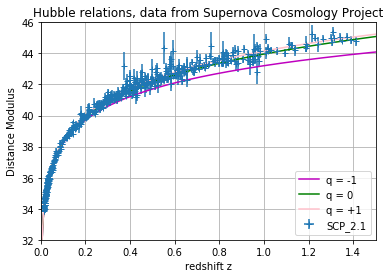

In [19]:
plt.figure()
plt.errorbar(zs,mm,xerr=dz,yerr=dm,fmt='+',label=dlabel)
plt.plot(zz,m1,'m',label="q = -1")                
plt.plot(zz,m2,'g',label="q = 0")
plt.plot(zz,m3,'pink',label="q = +1")
# q0 = +1 for a constant linear Hubble Law 
# q0 = 1/2 for a matter universe.
# q0 < 0 means acceleration.
plt.xlim([0.,1.5])
plt.ylim([32,46])
plt.xlabel('redshift z')
plt.ylabel('Distance Modulus')
plt.grid(b=True,which='both')
plt.legend(loc='lower right')
plt.title('Hubble relations, data from Supernova Cosmology Project')
plt.show()
